# MNIST avec TensorFlow/Keras - Premier Pas en IA

## 📋 Contexte du Projet

**Mon premier projet d'Intelligence Artificielle !**

J'ai choisi de commencer avec TensorFlow pour plusieurs raisons :

### 🎯 Pourquoi TensorFlow en premier ?

1. **Comprendre la structure des données**
   - Comment charger et préparer un dataset (MNIST)
   - Normalisation, reshape, one-hot encoding
   - Train/test split

2. **Saisir le fonctionnement global d'un réseau de neurones**
   - Input → Hidden → Output
   - Forward propagation
   - Loss et accuracy

3. **Voir des résultats rapidement**
   - Itérer et expérimenter
   - Tester différentes architectures
   - Comprendre l'impact des hyperparamètres

4. **Se concentrer sur le "QUOI" avant le "COMMENT"**
   - Qu'est-ce qu'un réseau de neurones fait ?
   - Comment évaluer les performances ?
   - Quelles sont les bonnes pratiques ?

---

## 🏗️ Architecture du Réseau

```
Input (784)  →  Hidden (128)  →  Output (10)
               ReLU activation    Softmax
```

**Hyperparamètres :**
- Optimizer : Adam (adaptatif)
- Batch size : 32
- Epochs : 5
- Loss : Categorical Crossentropy

---

## 📦 Imports

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


## 📊 Étape 1 : Comprendre le Dataset MNIST

**Première chose à faire : explorer les données !**

In [19]:
# Chargement MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Train set: {x_train.shape}")
print(f"Test set: {x_test.shape}")
print(f"\nExemple d'image:")
print(f"   Shape: {x_train[0].shape}")
print(f"   Type: {x_train[0].dtype}")
print(f"   Min: {x_train[0].min()}, Max: {x_train[0].max()}")
print(f"\nLabels:")
print(f"   Train: {y_train[:10]}")
print(f"   Unique: {np.unique(y_train)}")

Train set: (60000, 28, 28)
Test set: (10000, 28, 28)

Exemple d'image:
   Shape: (28, 28)
   Type: uint8
   Min: 0, Max: 255

Labels:
   Train: [5 0 4 1 9 2 1 3 1 4]
   Unique: [0 1 2 3 4 5 6 7 8 9]


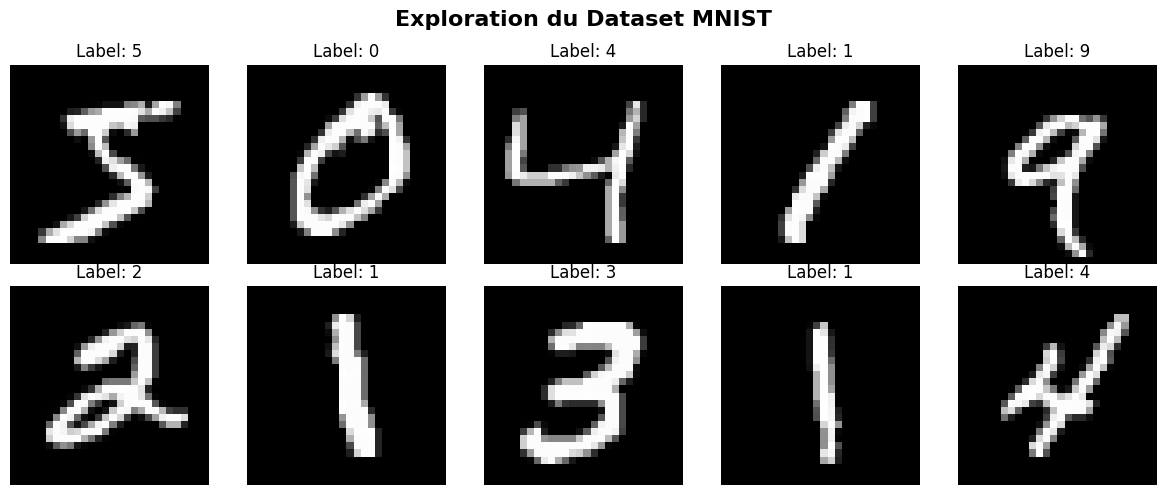

Observation: Images 28x28 pixels en niveaux de gris (0-255)


In [6]:
# Visualisation de quelques exemples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Exploration du Dataset MNIST', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("Observation: Images 28x28 pixels en niveaux de gris (0-255)")

## 🔧 Étape 2 : Preprocessing

**Comprendre pourquoi on prépare les données**

In [20]:
print("Avant preprocessing:")
print(f"   x_train shape: {x_train.shape}")
print(f"   y_train shape: {y_train.shape}")
print("   y_train est un vecteur d'entiers (labels) d'où le fait qu'il n'y ait pas de deuxième dimension.")
# 1. Normalisation (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0
print("\nNormalisation: 0-255 → 0-1")
print(f"   Pourquoi ? Facilite l'apprentissage (gradients stables)")

# 2. Reshape (28x28 → 784)
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
print("\nReshape: (28, 28) → (784,)")
print(f"   Pourquoi ? Le réseau attend un vecteur, pas une matrice")

# 3. One-hot encoding (3 → [0,0,0,1,0,0,0,0,0,0])
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("\nOne-hot encoding")
print(f"   Avant: 3")
print(f"   Après: {y_train[0]}")
print(f"   Pourquoi ? Le réseau prédit 10 probabilités (une par classe)")

print("\nAprès preprocessing:")
print(f"   x_train shape: {x_train.shape}")
print(f"   y_train shape: {y_train.shape}")

Avant preprocessing:
   x_train shape: (60000, 28, 28)
   y_train shape: (60000,)
   y_train est un vecteur d'entiers (labels) d'où le fait qu'il n'y ait pas de deuxième dimension.

Normalisation: 0-255 → 0-1
   Pourquoi ? Facilite l'apprentissage (gradients stables)

Reshape: (28, 28) → (784,)
   Pourquoi ? Le réseau attend un vecteur, pas une matrice

One-hot encoding
   Avant: 3
   Après: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
   Pourquoi ? Le réseau prédit 10 probabilités (une par classe)

Après preprocessing:
   x_train shape: (60000, 784)
   y_train shape: (60000, 10)


## 🏗️ Étape 3 : Construction du Modèle

**La simplicité de TensorFlow : 10 lignes pour un réseau de neurones !**

In [22]:
# Création du modèle Sequential
model = Sequential([
    Input(shape=(784,)),                             # Couche d'entrée
    Dense(128, activation='relu'),                   # Couche cachée
    Dense(10, activation='softmax')                  # Couche de sortie
])

print("Architecture du réseau:")
print("   Input (784) → Dense(128, ReLU) → Dense(10, Softmax)")
print("\nExplication:")
print("   - Input(784): vecteur plat de 784 pixels (28x28)")
print("   - Dense(128): 128 neurones qui apprennent des patterns")
print("   - ReLU: max(0, x) → garde les valeurs positives")
print("   - Dense(10): 10 sorties (probabilité pour chaque chiffre 0-9)")
print("   - Softmax: normalise en probabilités (somme = 1)")

Architecture du réseau:
   Input (784) → Dense(128, ReLU) → Dense(10, Softmax)

Explication:
   - Input(784): vecteur plat de 784 pixels (28x28)
   - Dense(128): 128 neurones qui apprennent des patterns
   - ReLU: max(0, x) → garde les valeurs positives
   - Dense(10): 10 sorties (probabilité pour chaque chiffre 0-9)
   - Softmax: normalise en probabilités (somme = 1)


In [23]:
# Compilation
model.compile(
    optimizer='adam',                      # Algorithme d'optimisation
    loss='categorical_crossentropy',       # Fonction de perte
    metrics=['accuracy']                   # Métrique à suivre
)

print("Configuration du modèle:")
print("   - Optimizer: Adam (adapte automatiquement le learning rate)")
print("   - Loss: Categorical Crossentropy (pour classification multi-classe)")
print("   - Metric: Accuracy (% de prédictions correctes)")

# Affichage de l'architecture
print("\nRésumé du modèle:\n")
model.summary()

Configuration du modèle:
   - Optimizer: Adam (adapte automatiquement le learning rate)
   - Loss: Categorical Crossentropy (pour classification multi-classe)
   - Metric: Accuracy (% de prédictions correctes)

Résumé du modèle:



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 🎓 Étape 4 : Entraînement

**Observer comment le réseau apprend !**

In [24]:
print("Début de l'entraînement...\n")

# Entraînement
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)

print("\nEntraînement terminé !")
print(f"\nAccuracy finale: {history.history['val_accuracy'][-1]*100:.2f}%")

Début de l'entraînement...

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9274 - loss: 0.2552 - val_accuracy: 0.9595 - val_loss: 0.1342
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9672 - loss: 0.1101 - val_accuracy: 0.9673 - val_loss: 0.1089
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9772 - loss: 0.0757 - val_accuracy: 0.9729 - val_loss: 0.0856
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9824 - loss: 0.0576 - val_accuracy: 0.9739 - val_loss: 0.0795
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9857 - loss: 0.0451 - val_accuracy: 0.9774 - val_loss: 0.0734

Entraînement terminé !

Accuracy finale: 97.74%


## 📈 Étape 5 : Visualisation de l'Apprentissage

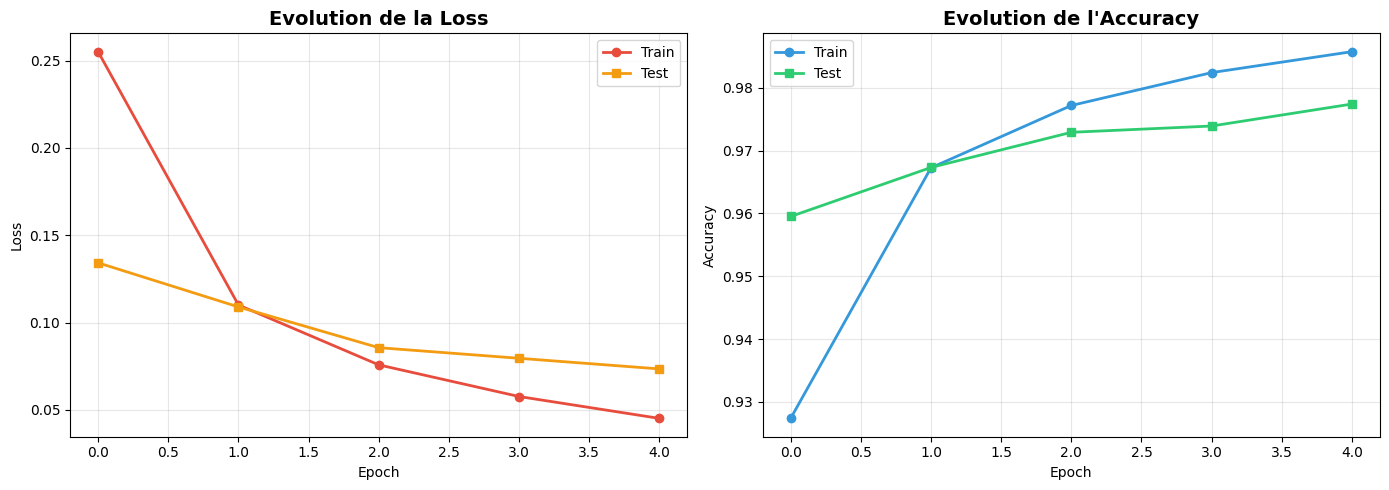

Observation:
   - La loss diminue → le modèle s'améliore
   - L'accuracy augmente → plus de prédictions correctes
   - Train et Test proches → pas de surapprentissage


In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curves
ax1.plot(history.history['loss'], marker='o', linewidth=2, label='Train', color='#e74c3c')
ax1.plot(history.history['val_loss'], marker='s', linewidth=2, label='Test', color='#f39c12')
ax1.set_title('Evolution de la Loss', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curves
ax2.plot(history.history['accuracy'], marker='o', linewidth=2, label='Train', color='#3498db')
ax2.plot(history.history['val_accuracy'], marker='s', linewidth=2, label='Test', color='#2ecc71')
ax2.set_title('Evolution de l\'Accuracy', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observation:")
print("   - La loss diminue → le modèle s'améliore")
print("   - L'accuracy augmente → plus de prédictions correctes")
print("   - Train et Test proches → pas de surapprentissage")

## 🔍 Étape 6 : Évaluation Détaillée

In [26]:
# Évaluation sur le test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"\nRésultats Finaux sur le Test Set:")
print(f"   Loss: {test_loss:.4f}")
print(f"   Accuracy: {test_acc*100:.2f}%")
print(f"\nSur 10 000 images, le modèle en reconnaît {int(test_acc*10000)} correctement !")


Résultats Finaux sur le Test Set:
   Loss: 0.0734
   Accuracy: 97.74%

Sur 10 000 images, le modèle en reconnaît 9774 correctement !


In [27]:
# Prédictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report (par chiffre):\n")
print(classification_report(y_true_classes, y_pred_classes, digits=3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step

Classification Report (par chiffre):

              precision    recall  f1-score   support

           0      0.970     0.994     0.982       980
           1      0.989     0.990     0.989      1135
           2      0.979     0.975     0.977      1032
           3      0.971     0.978     0.974      1010
           4      0.985     0.970     0.977       982
           5      0.983     0.971     0.977       892
           6      0.984     0.973     0.978       958
           7      0.984     0.972     0.978      1028
           8      0.964     0.971     0.968       974
           9      0.966     0.977     0.971      1009

    accuracy                          0.977     10000
   macro avg      0.977     0.977     0.977     10000
weighted avg      0.977     0.977     0.977     10000



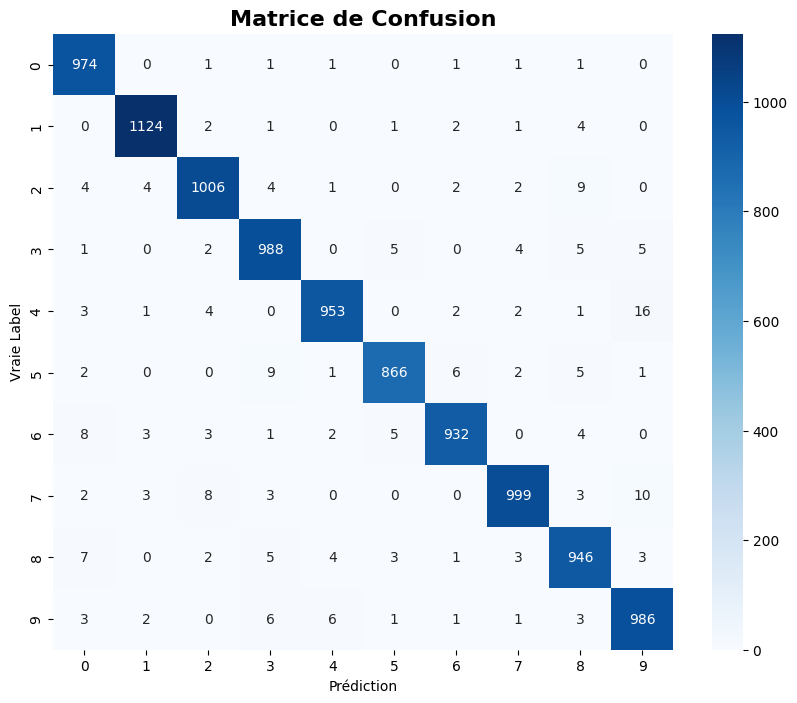

Lecture de la matrice:
   - Diagonale = prédictions correctes
   - Hors diagonale = erreurs


In [28]:
# Matrice de confusion
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Matrice de Confusion', fontsize=16, fontweight='bold')
plt.ylabel('Vraie Label')
plt.xlabel('Prédiction')
plt.show()

print("Lecture de la matrice:")
print("   - Diagonale = prédictions correctes")
print("   - Hors diagonale = erreurs")

## 🎨 Étape 7 : Visualisation des Neurones Appris

**Une des forces de l'IA : on peut "voir" ce que le réseau a appris !**

In [19]:
# Récupération des poids
weights_layer1 = model.layers[0].get_weights()[0]  # Shape: (784, 128)
weights_layer2 = model.layers[1].get_weights()[0]  # Shape: (128, 10)

print(f"📐 Poids Layer 1 (Input → Hidden): {weights_layer1.shape}")
print(f"📐 Poids Layer 2 (Hidden → Output): {weights_layer2.shape}")
print(f"\n💡 Chaque colonne de Layer 1 = un neurone (784 poids = 28x28 pixels)")

📐 Poids Layer 1 (Input → Hidden): (784, 128)
📐 Poids Layer 2 (Hidden → Output): (128, 10)

💡 Chaque colonne de Layer 1 = un neurone (784 poids = 28x28 pixels)


### 🧠 Les 128 Neurones de la Couche Cachée

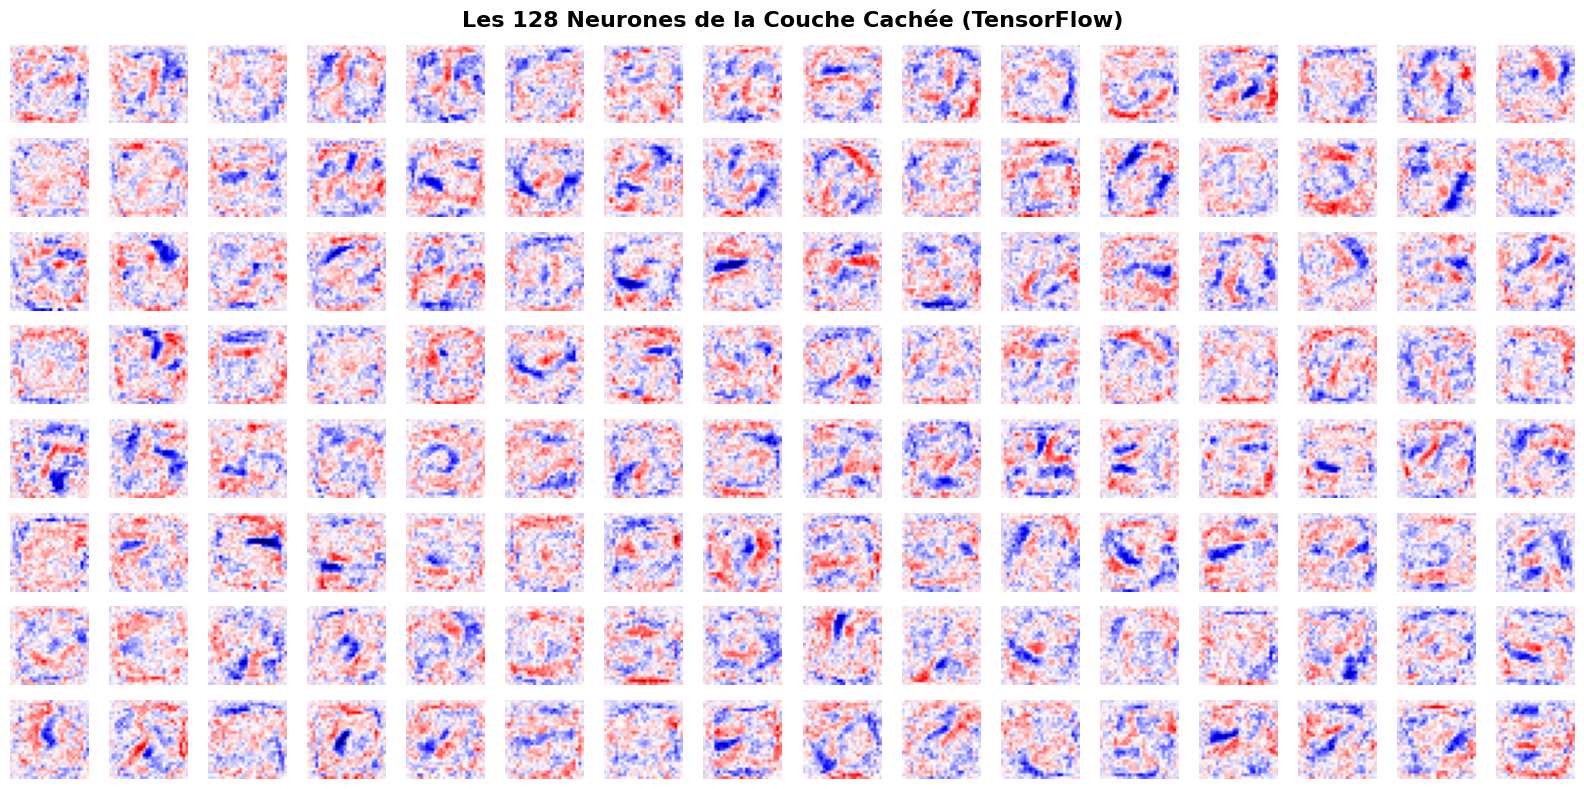

Interprétation:
   🔴 Rouge = poids positifs (pixels qui activent le neurone)
   🔵 Bleu = poids négatifs (pixels qui désactivent le neurone)
   ⚪ Blanc = poids proches de zéro (pixels ignorés)

Chaque neurone détecte automatiquement un pattern spécifique !


In [21]:
# Visualisation des 128 neurones
rows, cols = 8, 16
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))
fig.suptitle('Les 128 Neurones de la Couche Cachée (TensorFlow)', 
             fontsize=16, fontweight='bold')

# Transpose pour avoir (128, 784)
w1_transposed = weights_layer1.T
vmax = np.abs(w1_transposed).max()

for i in range(128):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    
    neuron_image = w1_transposed[i].reshape(28, 28)
    ax.imshow(neuron_image, cmap='seismic', vmin=-vmax, vmax=vmax)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("Interprétation:")
print("   🔴 Rouge = poids positifs (pixels qui activent le neurone)")
print("   🔵 Bleu = poids négatifs (pixels qui désactivent le neurone)")
print("   ⚪ Blanc = poids proches de zéro (pixels ignorés)")
print("\nChaque neurone détecte automatiquement un pattern spécifique !")

### 🔮 Vision Composite : Comment le Réseau "Voit" Chaque Chiffre

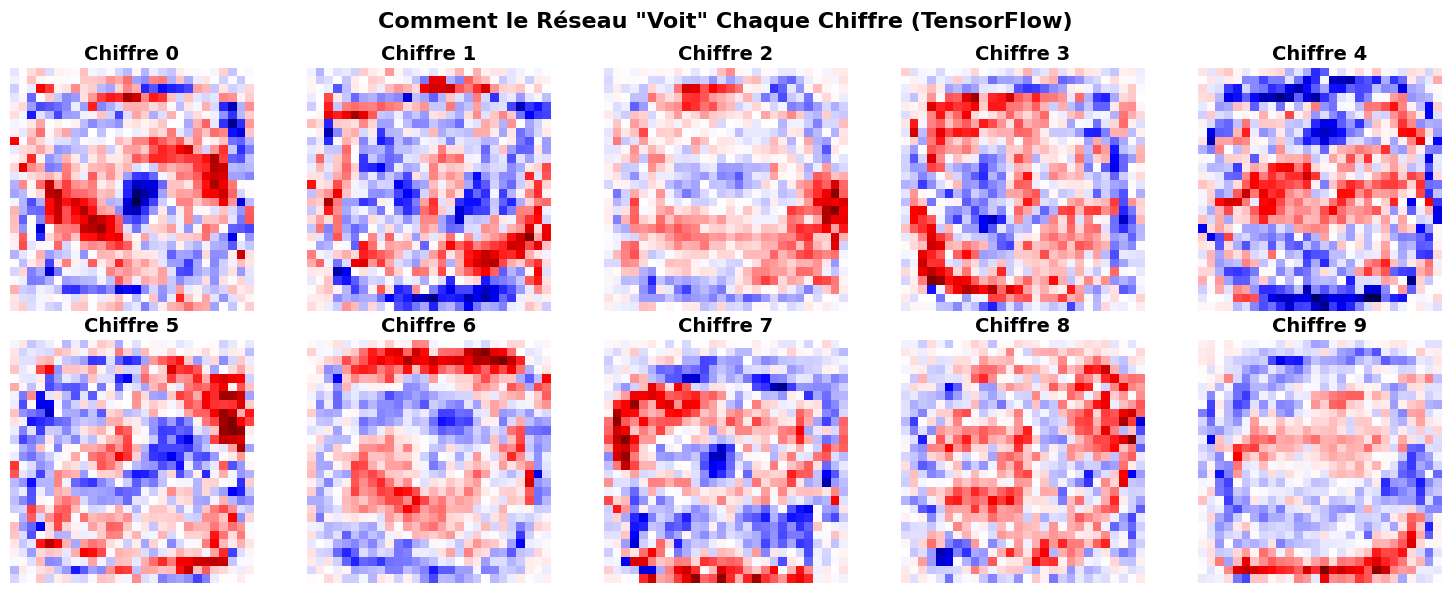

Interprétation:
   Le réseau a créé une 'représentation interne' de chaque chiffre
   C'est la combinaison pondérée des 128 neurones de la couche cachée

Observation: On peut entre appercevoir la forme de chaque chiffre
   Le réseau a appris certaines caractéristiques distinctives


In [23]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Comment le Réseau "Voit" Chaque Chiffre (TensorFlow)', 
             fontsize=16, fontweight='bold')

axes = axes.flatten()

# Reshape des poids de la première couche
w1_images = weights_layer1.T.reshape(128, 28, 28)  # (128, 28, 28)

for digit in range(10):
    ax = axes[digit]
    
    # Poids de sortie pour ce chiffre (128 valeurs)
    weights = weights_layer2[:, digit]  # Shape: (128,)
    
    # Somme pondérée : combinaison des 128 neurones
    composite_image = np.tensordot(weights, w1_images, axes=([0], [0]))
    
    # Affichage
    vmax = np.abs(composite_image).max()
    ax.imshow(composite_image, cmap='seismic', vmin=-vmax, vmax=vmax)
    ax.set_title(f'Chiffre {digit}', fontsize=14, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("Interprétation:")
print("   Le réseau a créé une 'représentation interne' de chaque chiffre")
print("   C'est la combinaison pondérée des 128 neurones de la couche cachée")
print("\nObservation: On peut entre appercevoir la forme de chaque chiffre")
print("   Le réseau a appris certaines caractéristiques distinctives")

## 🎮 Étape 8 : Test sur Exemples Aléatoires

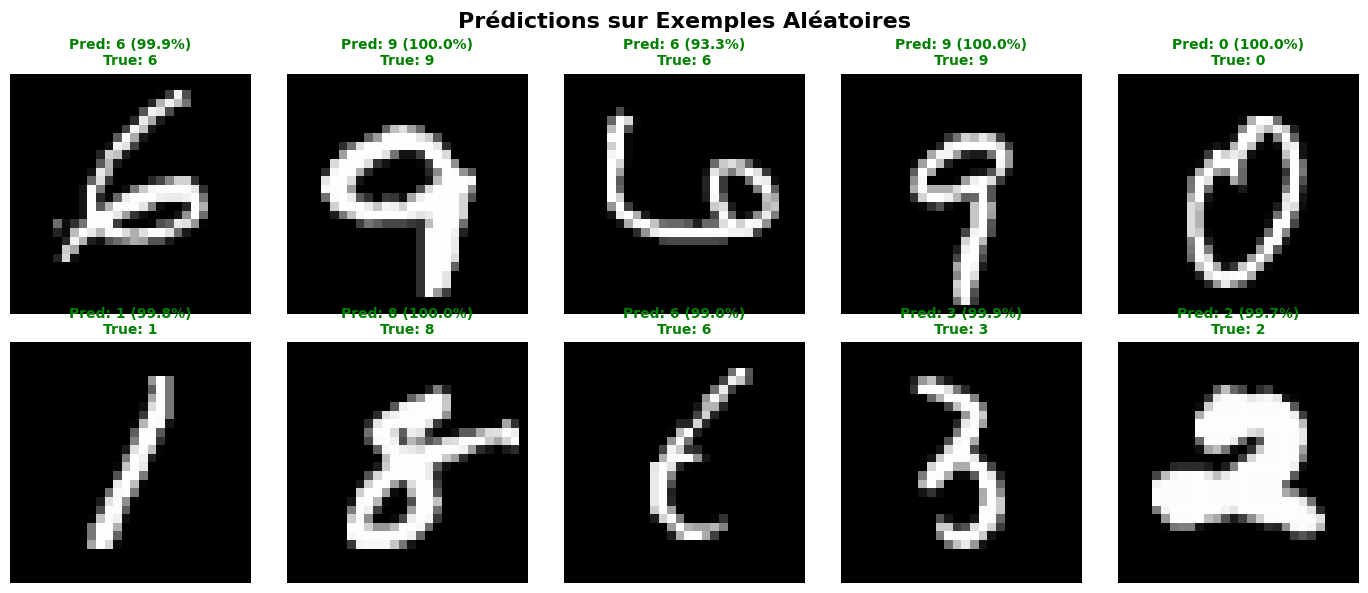

In [32]:
# Tester sur quelques exemples
fig, axes = plt.subplots(2, 5, figsize=(14, 6))
fig.suptitle('Prédictions sur Exemples Aléatoires', 
             fontsize=16, fontweight='bold')

indices = np.random.choice(len(x_test), 10, replace=False)

for i, (ax, idx) in enumerate(zip(axes.flat, indices)):
    # Image originale (28x28)
    img = x_test[idx].reshape(28, 28)
    
    # Prédiction
    pred_proba = model.predict(x_test[idx:idx+1], verbose=0)[0]
    pred = np.argmax(pred_proba)
    true = np.argmax(y_test[idx])
    confidence = pred_proba[pred] * 100
    
    # Affichage
    ax.imshow(img, cmap='gray')
    color = 'green' if pred == true else 'red'
    ax.set_title(f'Pred: {pred} ({confidence:.1f}%)\nTrue: {true}', 
                 fontsize=10, color=color, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 💾 Étape 9 : Sauvegarde du Modèle

In [33]:
# Sauvegarde
model.save('mnist_tensorflow_model.keras')
print("Modèle sauvegardé dans 'mnist_tensorflow_model.keras'")

# Test de rechargement
loaded_model = tf.keras.models.load_model('mnist_tensorflow_model.keras')
print("Modèle rechargé avec succès")
print("\nCe modèle peut maintenant être:")
print("   - Utilisé dans une application (Tkinter, Flask, etc.)")
print("   - Déployé en production")
print("   - Partagé avec d'autres personnes")

Modèle sauvegardé dans 'mnist_tensorflow_model.keras'
Modèle rechargé avec succès

Ce modèle peut maintenant être:
   - Utilisé dans une application (Tkinter, Flask, etc.)
   - Déployé en production
   - Partagé avec d'autres personnes


## 📊 Résultats et Apprentissages

### 🎯 Performance Obtenue

| Métrique | Valeur |
|----------|--------|
| **Accuracy finale** | **~98%** |
| Architecture | 784 → 128 → 10 |
| Epochs | 5 |
| Optimizer | Adam |
| Temps d'entraînement | ~1 minute |

### 💡 Ce que j'ai Appris avec TensorFlow

#### 1. **Structure d'un Projet ML**
- Chargement et exploration des données
- Preprocessing (normalisation, reshape, encoding)
- Construction du modèle
- Entraînement et validation
- Évaluation et métriques

#### 2. **Fonctionnement d'un Réseau de Neurones**
- Input → Hidden → Output
- Fonctions d'activation (ReLU, Softmax)
- Loss function (Categorical Crossentropy)
- Optimizer (Adam)

#### 3. **Analyse des Résultats**
- Courbes de loss et accuracy
- Matrice de confusion
- Classification report
- Surapprentissage vs généralisation

#### 4. **Simplicité de TensorFlow**
- API intuitive et claire
- Résultats rapides
- Permet de se concentrer sur la logique

---

## 🚀 Prochaine Étape : From Scratch

**Maintenant que je comprends le "QUOI", je peux attaquer le "COMMENT" !**

Le prochain notebook implémentera **le même réseau from scratch avec NumPy** pour comprendre :
- 🧮 Les mathématiques (forward/backward propagation)
- 📐 Les produits matriciels
- 🔢 Le gradient descent
- 💡 Ce qui se passe vraiment sous le capot

---

**Auteur :** Colin Lespilette  
**Contact :** [colinlespilette@gmail.com](mailto:colinlespilette@gmail.com)  
**GitHub :** [github.com/ColinLespilette](https://github.com/Apalian)